# Project for Machine Learning course : Quality sleep prediction

Import some library for the project :

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction

## 1.1 Scientific Context and Motivation

Sleep is a fundamental biological process that directly influences cognitive performance, metabolic regulation, cardiovascular health, and psychological well-being. Despite its importance, sleep disorders and chronic sleep degradation affect a significant fraction of the global population. The increasing prevalence of stress-related conditions, sedentary lifestyles, and irregular work schedules has made sleep health an important public health concern.

Beyond personal interest, this topic presents a scientifically relevant problem: sleep quality emerges from the interaction of physiological, behavioral, and psychological factors. These interactions are likely nonlinear and potentially correlated, making the problem particularly suitable for statistical modeling and machine learning approaches.

From a modeling perspective, sleep quality is not a directly measurable physical quantity but a subjective score influenced by measurable covariates such as stress level, physical activity, heart rate, and BMI. This raises an interesting question:

> To what extent can objective and semi-objective health indicators predict subjective sleep quality?

This project therefore aims to approach sleep health as a quantitative inference problem.

---

## 1.2 Dataset Description

The dataset used in this study is the **Sleep Health Data** dataset, obtained from **Kaggle**:

Source: https://www.kaggle.com/datasets/imaginativecoder/sleep-health-data-sampled

In [454]:
path = '/content/Sleep_Data_Sampled.csv' # path to find the dataset
df= pd.read_csv(path) # our data set in data frame

df # First visualization

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,14997,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,14999,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


The dataset contains 15,000 observations and 13 variables describing demographic, physiological, and lifestyle characteristics of individuals.

The features are:

- **Person ID:** Unique identifier (non-informative for prediction).
- **Gender:** Binary categorical variable (Male/Female).
- **Age:** Age in years.
- **Occupation:** Profession category.
- **Sleep Duration (hours):** Number of hours slept per day.
- **Quality of Sleep (scale: 1-10):** Subjective sleep quality score.
- **Physical Activity Level (minutes/day):** Daily exercise duration.
- **Stress Level (scale: 1-10):** Subjective stress score.
- **BMI Category:** Underweight, Normal, Overweight.
- **Blood Pressure (systolic/diastolic):** Cardiovascular indicator.
- **Heart Rate (bpm):** Resting heart rate.
- **Daily Steps:** Daily step count.
- **Sleep Disorder:** None, Insomnia, or Sleep Apnea.

The target variable chosen for this study is:

$$\text{Quality of Sleep}$$

This is treated as a supervised learning regression problem, where the objective is to model:

$$f : X → y$$

with $X$ representing the set of physiological, demographic, and behavioral features, and $y$ the sleep quality score.

---

# 1.3 Problem Formulation

The problem can be formulated as follows:

Given a dataset of individuals characterized by health and lifestyle variables,
estimate a predictive function that maps these variables to a continuous sleep quality score.

Two main scientific questions guide this project:

1. Is sleep quality predominantly determined by linear relationships with measurable health indicators?
2. Does the predictive structure require nonlinear models with higher representational capacity?

Answering these questions requires:

- Careful data preprocessing and statistical analysis,
- Interpretation of correlations and potential multicollinearity,
- Comparison between classical machine learning models and deep neural networks,
- Rigorous evaluation of bias-variance behavior.

---

# 1.4 Why This Dataset?

This dataset is particularly well-suited for a machine learning study for several reasons:

1. It contains both subjective and objective measurements.
2. It combines continuous and categorical variables.
3. The sample size (15k observations) is sufficient to train both classical and deep models without severe overfitting.
4. The target variable is continuous and bounded, making it suitable for regression analysis.
5. The variables exhibit plausible causal structure (e.g., stress $\rightarrow$ sleep degradation, activity $\rightarrow$ improved sleep), allowing meaningful interpretation.

Unlike purely synthetic datasets or benchmark datasets used only for performance comparison, this dataset addresses a real-world health issue with practical implications.

---

# 2. Data Cleaning and Preprocessing

## 2.1 Data Integrity Verification

Before any modeling procedure, it is essential to verify the structural integrity of the dataset. Improper handling of missing values, duplicates, or inconsistent identifiers can introduce bias and compromise the validity of subsequent analyses.

In [455]:
# Check for duplicates and missing values
print('Missing data (Nan):\n', df.isna().sum())
print('\n -----------------------------\n')
print('Duplicates:', df.duplicated().sum())
print('\n -----------------------------\n')
print("Unique value in Person ID:",df['Person ID'].nunique())

Missing data (Nan):
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

 -----------------------------

Duplicates: 0

 -----------------------------

Unique value in Person ID: 15000


The following checks were performed:

- No missing values were detected across all columns.
- No duplicated rows were identified.
- The number of unique Person ID entries equals 15,000, matching exactly the number of observations.

This confirms that each row corresponds to a distinct individual and that the dataset is structurally consistent.

Given that Person ID serves purely as an identifier and carries no predictive information, it was set as the index of the DataFrame to:

1. Prevent its accidental inclusion in the feature matrix,
2. Preserve traceability of individuals,
3. Improve structural clarity of the dataset.

In [456]:
df.set_index('Person ID', inplace=True)

# Check for duplicates now
print('Duplicates:', df.duplicated().sum())

Duplicates: 10148


Upon setting the Person ID as the unique index for our dataframe, a significant structural anomaly was identified: out of the initial 15,000 observations, approximately 10,148 were identified as duplicates.

From a statistical perspective, maintaining these duplicates would lead to a severe Data Leakage issue, where the model could potentially memorize identical observations during training and "encounter" them again during testing, leading to artificially inflated performance metrics.

We have therefore proceeded with a strict deduplication process, resulting in a clean dataset of approximately 5,000 unique records. While the sample size has decreased, the statistical quality and generalization potential of the data have significantly improved. For a multidimensional analysis of sleep health, 5,000 samples remain a robust basis for training both classical Machine Learning models and Neural Networks, ensuring that our findings reflect real-world patterns rather than redundant noise.

In [457]:
df= df.drop_duplicates().copy() # drop the dublicates
print('Duplicates:', df.duplicated().sum())
print(f"Cleaned dataset shape: {df.shape}")

Duplicates: 0
Cleaned dataset shape: (4852, 12)


---

# 2.2 Structural Transformation of Blood Pressure

The original Blood Pressure variable was encoded as a string of the form:

$$ \text{systolic/diastolic}$$

This format is not directly usable in numerical machine learning pipelines and does not allow independent modeling of systolic and diastolic effects.

From a physiological perspective, systolic and diastolic pressures reflect distinct aspects of cardiovascular function:

- Systolic pressure corresponds to arterial pressure during cardiac contraction.
- Diastolic pressure corresponds to arterial pressure during cardiac relaxation.

Treating them as separate continuous variables is therefore both mathematically and medically justified.

In [458]:
df[['Systolic', 'Diastolic']] = (
    df['Blood Pressure']
    .str.split('/', expand=True)
    .astype(int)
)
df = df.drop(columns=['Blood Pressure'])

In [459]:
df.head() # visualization to see the 2 new columns

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
Person ID,,,,,,,,,,,,,
1,Male,35,Doctor,6.65,7,50,7,Normal Weight,71,7100,Healthy,120,80
2,Male,42,Teacher,6.90,8,52,4,Normal,66,7000,Healthy,135,90
3,Male,34,Software Engineer,6.95,7,66,6,Overweight,74,6100,Healthy,126,83
4,Male,32,Doctor,6.90,6,52,7,Normal,71,6500,Healthy,120,80
5,Male,37,Lawyer,6.85,7,60,6,Normal,71,6500,Healthy,125,80


The column was split into two numerical features:

- Systolic
- Diastolic

The original string column was removed after transformation.

This transformation ensures numerical compatibility with machine learning models while preserving physiological interpretability.

---

## 2.3 Categorical Variable Handling


In [460]:
# Filtering the columns where the data type is 'object'
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Displaying the list of categorical features
print(f"Categorical features to be encoded: {categorical_columns}")

Categorical features to be encoded: ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


The dataset contains several categorical variables:

- Gender
- Occupation
- BMI Category
- Sleep Disorder

Since most machine learning algorithms operate in numerical vector spaces, categorical variables must be encoded.

In [461]:
for col in categorical_columns:
  print('\n -----------------------------\n')
  print(f"{col} value:\n", df[col].value_counts())



 -----------------------------

Gender value:
 Gender
Male      2563
Female    2289
Name: count, dtype: int64

 -----------------------------

Occupation value:
 Occupation
Nurse                   881
Doctor                  874
Engineer                817
Lawyer                  655
Teacher                 598
Accountant              452
Salesperson             300
Software Engineer        98
Sales Representative     79
Scientist                77
Manager                  21
Name: count, dtype: int64

 -----------------------------

BMI Category value:
 BMI Category
Normal           2265
Overweight       1739
Normal Weight     472
Obese             376
Name: count, dtype: int64

 -----------------------------

Sleep Disorder value:
 Sleep Disorder
Healthy        2481
Insomnia       1197
Sleep Apnea    1174
Name: count, dtype: int64


### 2.3.1 BMI Category Consistency

An inconsistency was detected in the `BMI Category` column, where both "Normal" and "Normal Weight" appeared. These represent identical physiological states.

To avoid artificial category inflation and spurious feature fragmentation, these labels were standardized prior to encoding.

This step is crucial because redundant categorical levels artificially increase dimensionality and may introduce unnecessary variance in linear models.

In [462]:
df['BMI Category'] = df['BMI Category'].replace({
    'Normal Weight': 'Normal'
})

print("BMI Category value:\n", df['BMI Category'].value_counts())

BMI Category value:
 BMI Category
Normal        2737
Overweight    1739
Obese          376
Name: count, dtype: int64


### 2.3.2 Pipeline

Now, a preprocessing pipeline can be set up to ensure:

- Proper transformation of categorical variables,
- Reproducibility of preprocessing steps,
- Prevention of data leakage between training and testing sets.

In [463]:
## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector

## Define X and y
target = 'Quality of Sleep'

X = df.drop(columns=target).copy()
y = df[target].copy()

# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Defining a list of features for both the categorical and the numerical columns

cat_feature = make_column_selector(dtype_include='object')   # Creating a categorical data selector
num_feature = make_column_selector(dtype_include='number')   # Creating a numeric data selector

# Instantiating the Transformers

impute_cat = SimpleImputer(strategy='most_frequent') #better to keep the ffil but for simplicity reasons I will keep this one
impute_num = SimpleImputer(strategy='median') # we can be more sophisticated and make a mean imputation for widht like we did earlier, but I'll keep it simple for now
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')   # It is a numinal column with no order to it => So I used the One-hot encoding
scaler = StandardScaler()

# Making pipelines for each category

pip_cat = make_pipeline(impute_cat, ohe_encoder)
pip_num = make_pipeline(impute_num, scaler)

# Defining a tuple for each pathway

categorical_tup = ('Categorical', pip_cat, cat_feature)
numerical_tup = ('Numerical', pip_num, num_feature)

# Instantiating the ColumnTransformer

col_transformer = ColumnTransformer([numerical_tup, categorical_tup],remainder='passthrough', verbose_feature_names_out=False)
col_transformer

X_train_processed = col_transformer.fit_transform(X_train)
X_test_processed = col_transformer.transform(X_test)

---

## 2.4 Preprocessing Strategy

The preprocessing pipeline distinguishes between:

- Continuous variables: Age, Sleep Duration, Physical Activity, Stress Level, Heart Rate, Daily Steps, Systolic, Diastolic.
- Categorical variables: Gender, Occupation, BMI Category, Sleep Disorder.

Categorical variables were encoded using appropriate transformations within a pipeline framework to ensure that:

$$X_{train} \rightarrow \text{fit transform}$$

$$X_{test} \rightarrow \text{transform only}$$

This guarantees methodological correctness and avoids information leakage from the test set.

---

## 2.5 Summary of Preprocessing Decisions

All preprocessing choices were guided by three principles:

1. Statistical validity
2. Physiological interpretability
3. Compatibility with downstream machine learning models

At the end of this stage, the dataset is fully numerical, structurally consistent, and ready for exploratory data analysis.

## Regarde corélation entre features and target

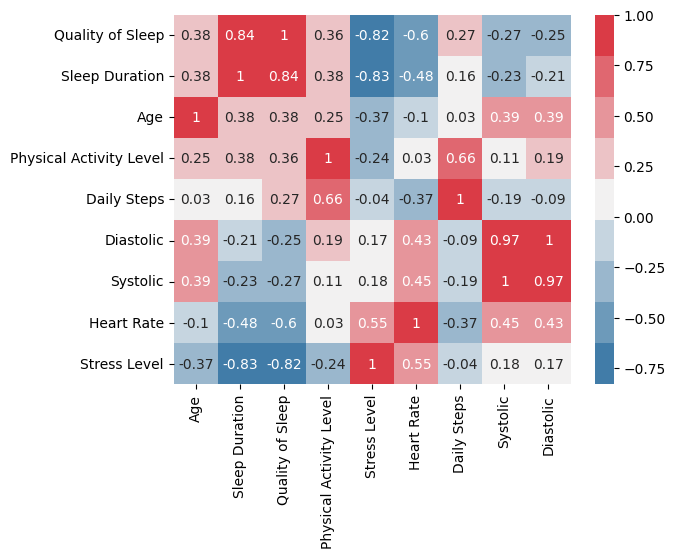

In [481]:
import seaborn as sns

corr = df.corr(numeric_only=True).sort_values(by=target, ascending=False).round(2)

ax = sns.heatmap(corr,
            cmap = sns.diverging_palette(240, 10, n=9), annot = True);

In [465]:
filt_abs_corr = corr[target].abs().sort_values(ascending=False)
filt_abs_corr

,Quality of Sleep
Quality of Sleep,1.00
Sleep Duration,0.84
Stress Level,0.82
Heart Rate,0.60
Age,0.38
Physical Activity Level,0.36
Daily Steps,0.27
Systolic,0.27
Diastolic,0.25


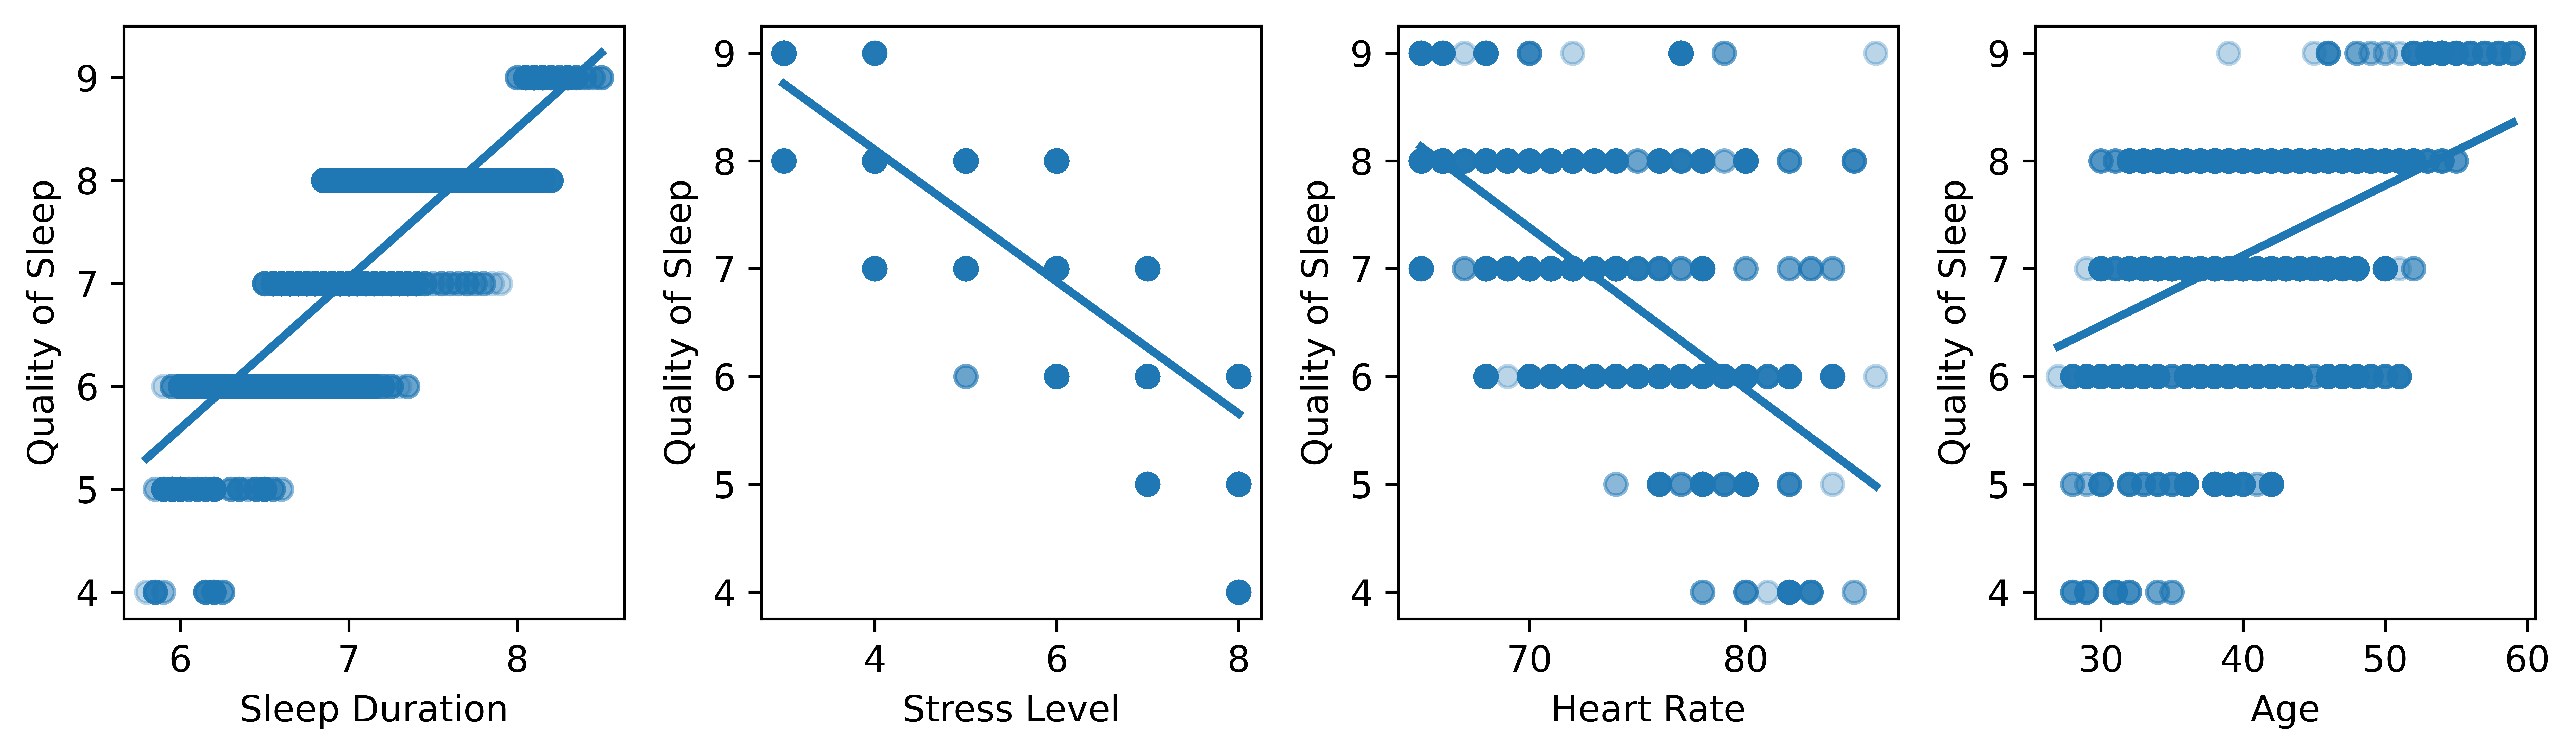

In [466]:
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (10,3), dpi=1000)
sns.regplot(x='Sleep Duration', y='Quality of Sleep', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='Stress Level', y='Quality of Sleep', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='Heart Rate', y='Quality of Sleep', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
sns.regplot(x='Age', y='Quality of Sleep', data=df, ci=None, ax = axes[3], scatter_kws={'alpha':0.3});
fig.tight_layout()

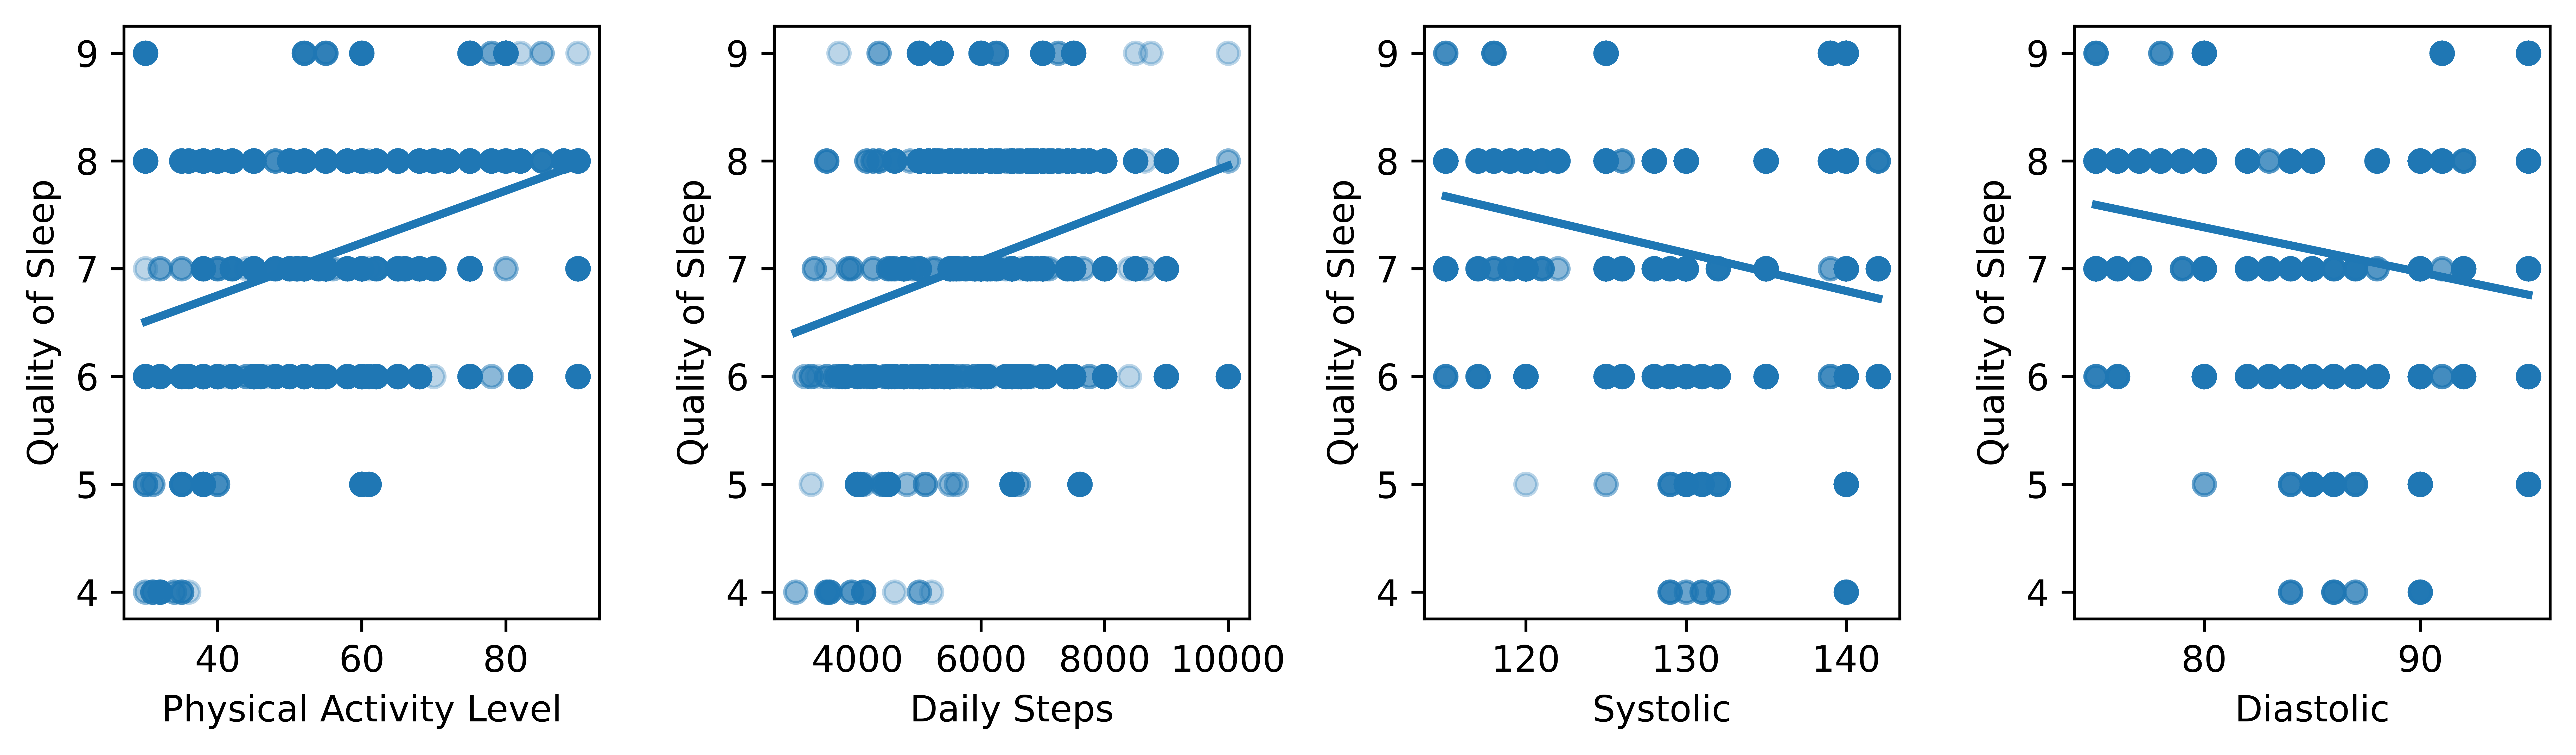

In [467]:
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (10,3), dpi=1000)
sns.regplot(x='Physical Activity Level', y='Quality of Sleep', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='Daily Steps', y='Quality of Sleep', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='Systolic', y='Quality of Sleep', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
sns.regplot(x='Diastolic', y='Quality of Sleep', data=df, ci=None, ax = axes[3], scatter_kws={'alpha':0.3});
fig.tight_layout()

## Observation
On voit que les 3 premieres colonnes sont quasi linéaire, mais cela n'est pas du tout le cas pour les autres colonnes.

# Utiliser le dataSet

## Modèle 1 : Linear Regression

In [468]:
# Regression model
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
model_pipe_LR = make_pipeline(col_transformer, linreg)

# Fit the modeling pipeline on the training data
model_pipe_LR.fit(X_train, y_train)

# Use the model to make predictions for training and testing data to evaluate later on

y_pred_train = model_pipe_LR.predict(X_train)

y_pred_test = model_pipe_LR.predict(X_test)


## Evaluation Modèle 1

In [469]:
#evaluation functions
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score # For model evaluation (using Regression metrics)

def eval_model(true, pred):
  MAE = mean_absolute_error(true, pred)
  MSE = mean_squared_error(true, pred)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(true, pred)

  print(f'MAE: {MAE:,.2f} \n MSE: {MSE:,.2f} \n RMSE: {RMSE:,.2f} \n R2: {r2:,.2f} ')

print('Train Evaluation Modèle 1, Linear Regression''\n')
eval_model(y_train, y_pred_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test, y_pred_test)

Train Evaluation Modèle 1, Linear Regression

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82 


Test Evaluation

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82 


## Modèle 2 : Random Forest

In [470]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

R_F_default = RandomForestRegressor(random_state = 42)

# Combine the preprocessing ColumnTransformer and the Random Forst model in a Pipeline
model_pipe_RF = make_pipeline(col_transformer, R_F_default)

# Fit the modeling pipeline on the training data
model_pipe_RF.fit(X_train, y_train)

train_preds = model_pipe_RF.predict(X_train)
test_preds = model_pipe_RF.predict(X_test)

train_rf_score = r2_score(y_train, train_preds)
test_rf_score = r2_score(y_test, test_preds)

print(f'- maximum depth of the random forest tree: {max([estimator.get_depth() for estimator in R_F_default.estimators_])}')
print(f'- the number of trees in the foreste? {R_F_default.n_estimators}' '\n')

# Use the model to make predictions for training and testing data to evaluate later on

y_pred_train = model_pipe_LR.predict(X_train)

y_pred_test = model_pipe_LR.predict(X_test)

- maximum depth of the random forest tree: 19
- the number of trees in the foreste? 100



## Evalution Modèle 2

In [471]:
print('Train Evaluation Modèle 2, Random Forest''\n')
eval_model(y_train, y_pred_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test, y_pred_test)

Train Evaluation Modèle 2, Random Forest

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82 


Test Evaluation

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82 


## Obseravtion :
On obtient des valeurs similaire ce qui pourrait signifier que les valeurs non corrélé sont de véritable bruit.
Les valeurs considéré comme du bruit par le modèle linéaire sont de vrai bruit.

# Neural Network

In [472]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from tensorflow.keras.metrics import Precision, Recall
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [473]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

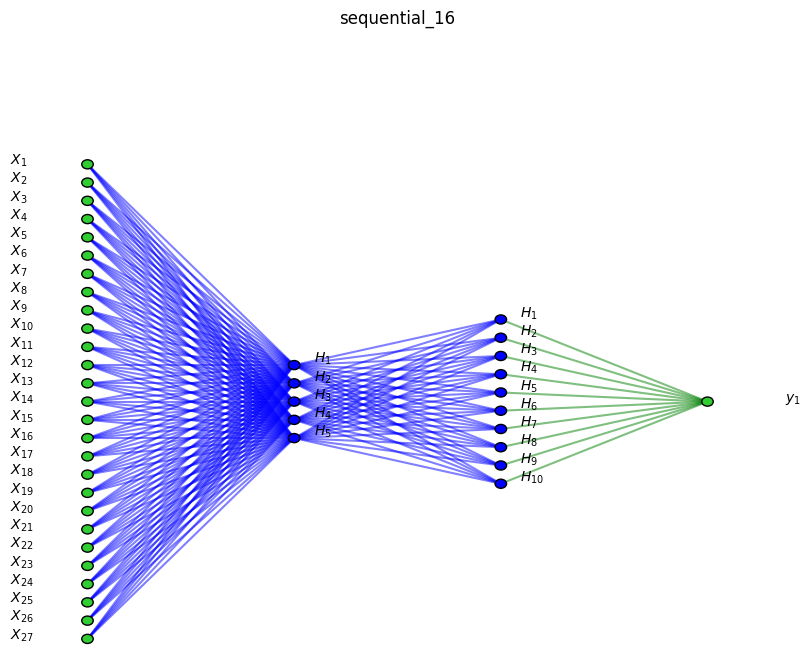

In [474]:
# Build your model
model = Sequential()
model.add(Dense(5, input_dim = X_train_processed.shape[1], activation='relu'))
model.add(Dense(10, activation='sigmoid'))
#model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# One output node with 'sigmoid' activation
model.summary()

# Visualize network
visualize_nn(model)

In [475]:
# fit your model
history = model.fit(X_train_processed, y_train,
          validation_data=(X_test_processed, y_test),
          epochs=20)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: -2.0159 - val_accuracy: 0.0000e+00 - val_loss: -7.4480
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -9.6889 - val_accuracy: 0.0000e+00 - val_loss: -16.7151
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -19.3013 - val_accuracy: 0.0000e+00 - val_loss: -26.1204
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -28.2393 - val_accuracy: 0.0000e+00 - val_loss: -33.9271
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -35.8364 - val_accuracy: 0.0000e+00 - val_loss: -40.6064
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -42.4397 - val_accuracy: 0.0000e+00 - val_loss: -47.6564
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -49.7842 - val_accuracy: 0.0000e+00 - val_loss: -54.9855
Epoch 8/20
114/114 ━━━━

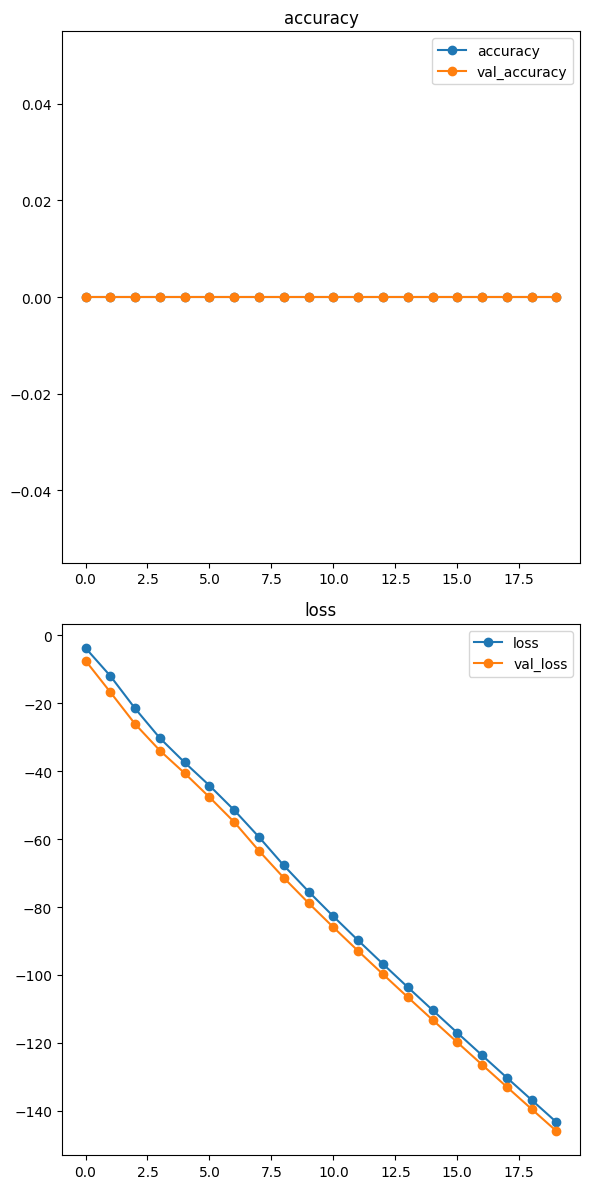

In [476]:
# Call the custom function
plot_history(history);

In [477]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_processed, y_test,return_dict=True)
result

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -146.6515


{'accuracy': 0.0, 'loss': -145.98794555664062}

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00       9.0
         5.0       0.00      0.00      0.00      35.0
         6.0       0.00      0.00      0.00     331.0
         7.0       0.00      0.00      0.00     234.0
         8.0       0.00      0.00      0.00     579.0
         9.0       0.00      0.00      0.00      25.0

    accuracy                           0.00    1213.0
   macro avg       0.00      0.00      0.00    1213.0
weighted avg       0.00      0.00      0.00    1213.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

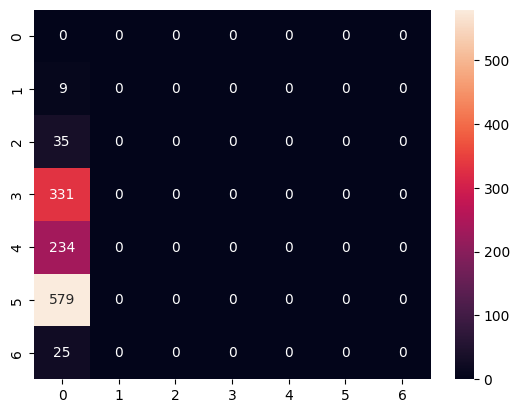

In [478]:
# evaluate the model with sklearn metrics
test_preds = model.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt ='g');